# Introduction to Python and Scikit-Learn
Note: This lab has been generated using material from Chapter 3 in ”Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow. The following link (https://github.com/ageron/handson-ml) contains the extended Jupyter notebook as well as more tasks so you can better familiarize yourself with Python and Scikit-learn.

# 1. MNIST
MNIST dataset, is a set of 70,000 small images of digits handwritten by high school students
and employees of the US Census Bureau. Each image is labeled with the digit it represents.
For the first task download and display some of the digits in the dataset.

In [3]:
import pandas as pd
import os
import numpy as np
# to make this notebook's output stable across runs
np.random.seed(42)
import sklearn # ML in python

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [5]:
mnist.values()

dict_values([array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), None, ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel6

In [6]:
X, y = mnist["data"], mnist["target"]
X.shape
#print(X[1])

(70000, 784)

In [7]:
y.shape
#print(len(y))
print(y[0])

5


Saving figure some_digit_plot


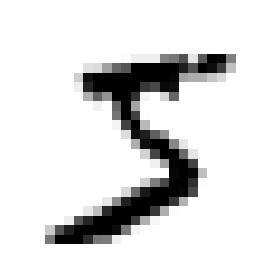

In [8]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

# 2. Binary Classifier
2.1 Identify one digit for example, the number 5. This “5-detector” will be an example of a
binary classifier, capable of distinguishing between just two classes, 5 and not-5. For this task
pick the Stochastic gradient descent classifier from the Scikit-Learn’s SGDClassifier class.

2.2 Evaluate the performance of your classifier by\
(a) Measuring accuracy using cross-validation.\
(b) The use of the confusion matrix.\
(c) Understanding the precision/recall trade-off.\
(d) The use of the ROC curve.

2.3 Compare the ROC curve generated by the RandomForestClassifier with the ROC curve
generated by the SGDClassifier

In [9]:
# change y to integer
y = y.astype(np.uint8)
type(y)

numpy.ndarray

In [10]:
# create a training and testing set
# The MNIST dataset is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images), so:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
y_train_5 = (y_train == 5) # make it as binary
y_test_5 = (y_test == 5)
print(y_train_5)

[ True False False ...  True False False]


In [12]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42) # reproducible results so set a random_state
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
sgd_clf.predict([some_digit])

array([ True])

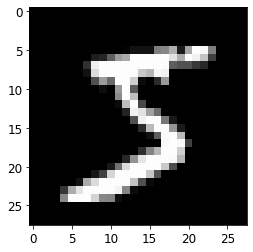

In [14]:
plt.imshow(some_digit_image, cmap="gray")

## Measuring Accuracy Using Cross-Vaildation

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

Let’s use the `cross_val_score()` function to evaluate our SGDClassifier model, using K-fold cross-validation with three folds. Remember that K-fold cross-validation means splitting the training set into K folds (in this case, three), then making predictions and evaluating them on each fold using a model trained on the remaining folds

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

## Confusion Matrix